In [1]:
import pystac

In [2]:
items=pystac.ItemCollection.from_file("results/search.json")

In [3]:
assets=items[-1].assets

In [5]:
visual_href=assets["visual"].href

In [6]:
import rioxarray

In [7]:
visual=rioxarray.open_rasterio(visual_href,overview_level=2)

In [8]:
visual

<xarray.DataArray (band: 3, y: 1373, x: 1373)>
[5655387 values with dtype=uint8]
Coordinates:
  * band         (band) int32 1 2 3
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [9]:
visual=visual.load()

(array([  4134.,  25739.,  77772., 165167., 261393., 319217., 322786.,
        333926., 343691., 330529., 345962., 374355., 288748., 251602.,
        235544., 194554., 227213., 122939., 111492., 105939.,  92678.,
         75286.,  63348.,  55555.,  48823.,  44174.,  40512.,  37481.,
         34812.,  32704.,  30917.,  28883.,  27709.,  30657.,  24251.,
         22676.,  21885.,  21156.,  20136.,  19374.,  19333.,  19092.,
         18767.,  18421.,  18648.,  19325.,  20786.,  23760.,  29292.,
        252244.]),
 array([  2.  ,   7.06,  12.12,  17.18,  22.24,  27.3 ,  32.36,  37.42,
         42.48,  47.54,  52.6 ,  57.66,  62.72,  67.78,  72.84,  77.9 ,
         82.96,  88.02,  93.08,  98.14, 103.2 , 108.26, 113.32, 118.38,
        123.44, 128.5 , 133.56, 138.62, 143.68, 148.74, 153.8 , 158.86,
        163.92, 168.98, 174.04, 179.1 , 184.16, 189.22, 194.28, 199.34,
        204.4 , 209.46, 214.52, 219.58, 224.64, 229.7 , 234.76, 239.82,
        244.88, 249.94, 255.  ]),
 <BarContainer obj

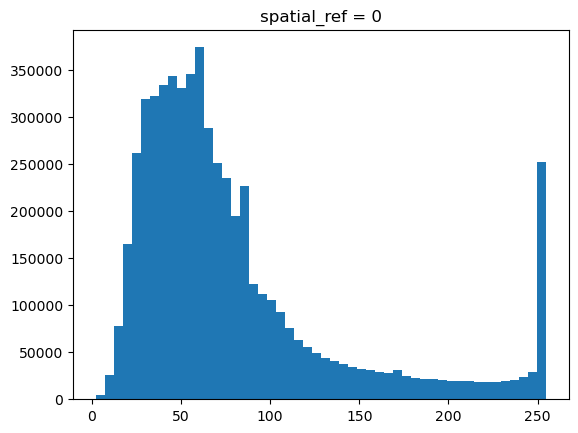

In [12]:
visual.plot(bins=50)

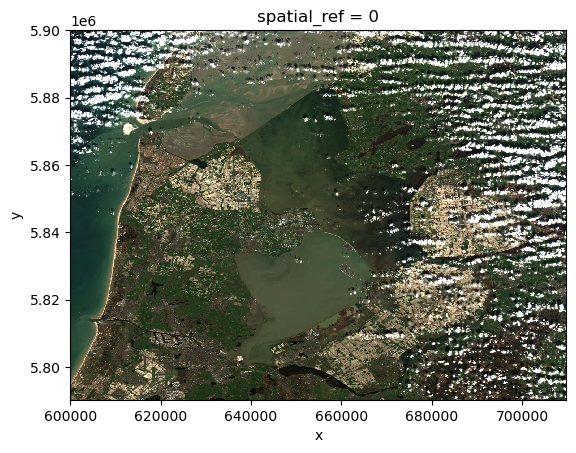

In [13]:
visual.plot.imshow()

In [18]:
%%time
median=visual.rolling(x=7,y=7).median()

CPU times: total: 11.1 s
Wall time: 11.5 s


In [19]:
median

<xarray.DataArray (band: 3, y: 1373, x: 1373)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., 41., 43., 44.],
        [nan, nan, nan, ..., 41., 43., 44.],
        [nan, nan, nan, ..., 42., 43., 44.]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., 62., 63., 65.],
        [nan, nan, nan, ..., 62., 63., 65.],
        [nan, nan, nan, ..., 63., 64., 66.]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., 32., 35., 37.],
        [nan, nan, nan, ..., 32., 35., 37.],
        [nan, nan, nan, ..., 33., 35., 37.]]], dtype=float32)
Coordinates:
  * band         (band) int32 1 2 3
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

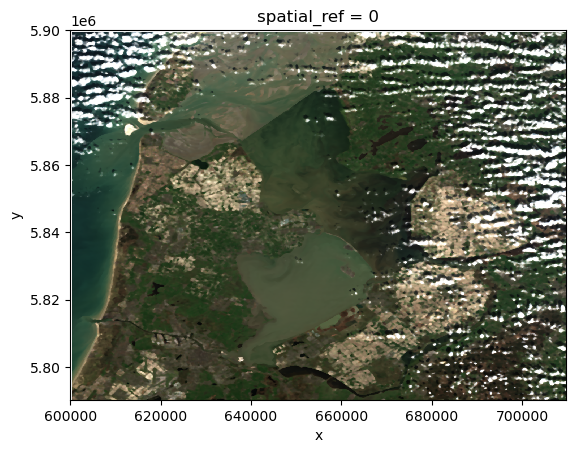

In [21]:
(median/255).plot.imshow()#wouldn't work because of the NaNs

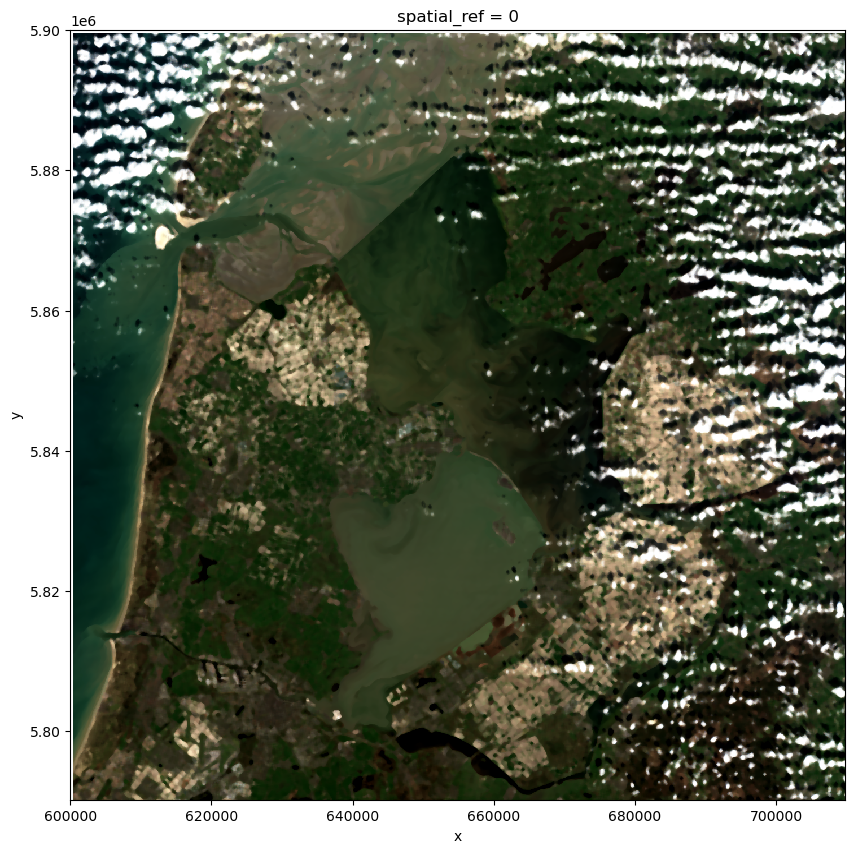

In [26]:
median.plot.imshow(robust=True, figsize=(10,10))

In [27]:
visual=rioxarray.open_rasterio(visual_href, overview_level=2,chunks=(3,500,500))

In [28]:
visual

<xarray.DataArray (band: 3, y: 1373, x: 1373)>
dask.array<open_rasterio-c8260d663d293f4b9b57642c4063ebfd<this-array>, shape=(3, 1373, 1373), dtype=uint8, chunksize=(3, 500, 500), chunktype=numpy.ndarray>
Coordinates:
  * band         (band) int32 1 2 3
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [35]:
visual=visual.persist(scheduler="threads",num_workers=4)

In [36]:
%%time
median=visual.rolling(x=7,y=7).median()

CPU times: total: 0 ns
Wall time: 21.3 ms


In [37]:
import dask

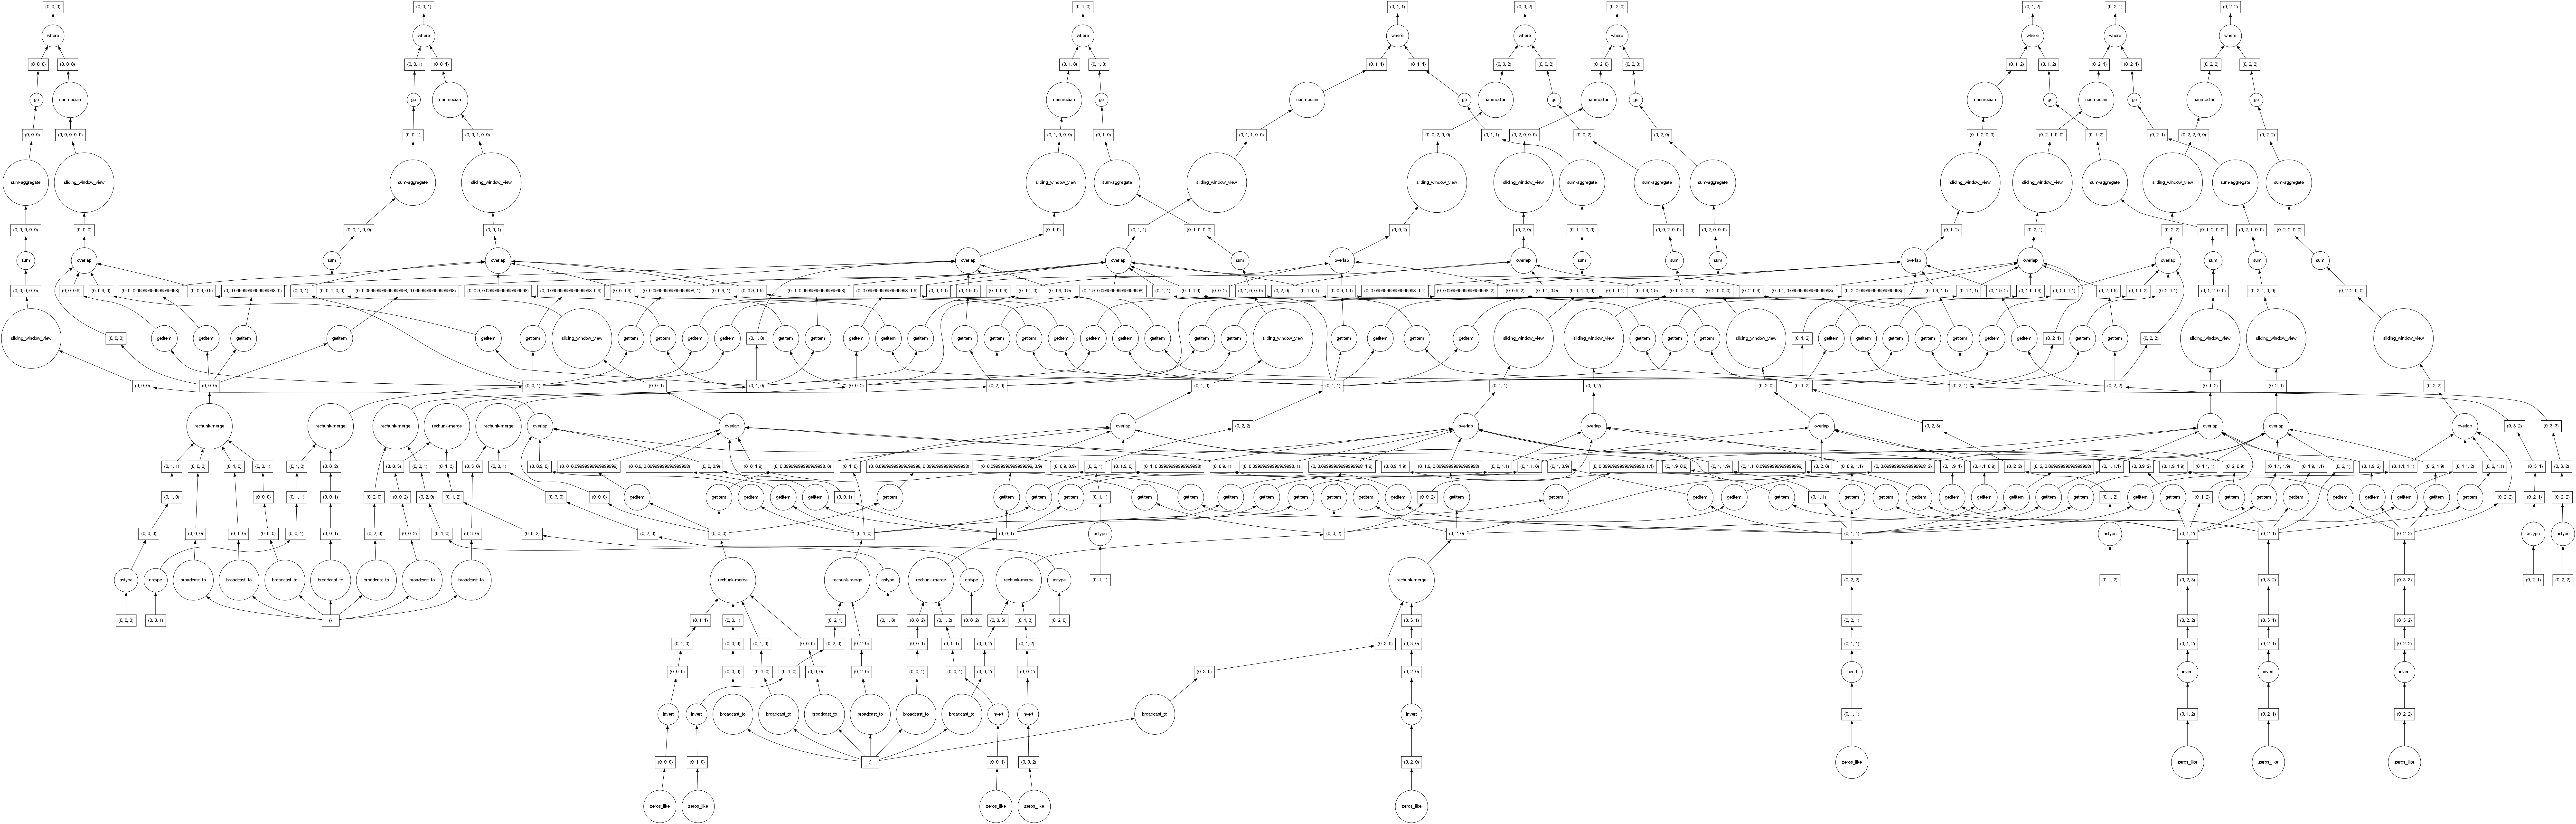

In [38]:
dask.visualize(median)

In [39]:
%%time
median=median.persist(scheduler="threads",num_workers=4)

CPU times: total: 11.4 s
Wall time: 4.24 s
